# Coronavirus/COVID-19 Timseries Forecasting

- ~~[GitHub Repo](https://github.com/jirvingphd/playing-with-coronavirus-data)~~
- James M. Irivng, Ph.D.
- james.irving.phd@gmail.com

> **~~NOTE: DATA ACQUISITION IS BEING RE-WORKED IN "Exploring Options for Replacing Covid Tracking Project Data_08-2021.ipnynb"~~** -08/12/21

In [1]:
## Fetch new data (if True (long process - ~2 mins)
RUN_FULL_WORKFLOW = False
RUN_MODELS = True

<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Coronavirus/COVID-19-Timseries-Forecasting" data-toc-modified-id="Coronavirus/COVID-19-Timseries-Forecasting-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Coronavirus/COVID-19 Timseries Forecasting</a></span></li><li><span><a href="#Business-Problem" data-toc-modified-id="Business-Problem-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Business Problem</a></span><ul class="toc-item"><li><ul class="toc-item"><li><span><a href="#Goal" data-toc-modified-id="Goal-2.0.1"><span class="toc-item-num">2.0.1&nbsp;&nbsp;</span>Goal</a></span></li><li><span><a href="#Methodology" data-toc-modified-id="Methodology-2.0.2"><span class="toc-item-num">2.0.2&nbsp;&nbsp;</span>Methodology</a></span></li></ul></li></ul></li><li><span><a href="#OBTAIN" data-toc-modified-id="OBTAIN-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>OBTAIN</a></span><ul class="toc-item"><li><span><a href="#Imports" data-toc-modified-id="Imports-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Imports</a></span></li><li><span><a href="#Data" data-toc-modified-id="Data-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>Data</a></span><ul class="toc-item"><li><span><a href="#Downloading-or-Loading-Data" data-toc-modified-id="Downloading-or-Loading-Data-3.2.1"><span class="toc-item-num">3.2.1&nbsp;&nbsp;</span>Downloading or Loading Data</a></span></li></ul></li></ul></li><li><span><a href="#EDA---Comparing-States" data-toc-modified-id="EDA---Comparing-States-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>EDA - Comparing States</a></span><ul class="toc-item"><li><span><a href="#09/12/21---Adding-EDA-Pre-Modeling" data-toc-modified-id="09/12/21---Adding-EDA-Pre-Modeling-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>09/12/21 - Adding EDA Pre-Modeling</a></span></li><li><span><a href="#Making-Plotly-Figures-for-App-[09/12/21]" data-toc-modified-id="Making-Plotly-Figures-for-App-[09/12/21]-4.2"><span class="toc-item-num">4.2&nbsp;&nbsp;</span><strong>Making Plotly Figures for App [09/12/21]</strong></a></span><ul class="toc-item"><li><span><a href="#TO-DO's" data-toc-modified-id="TO-DO's-4.2.1"><span class="toc-item-num">4.2.1&nbsp;&nbsp;</span><strong>TO DO's</strong></a></span></li><li><span><a href="#flexible-data-loading-in-get_state_df_ts" data-toc-modified-id="flexible-data-loading-in-get_state_df_ts-4.2.2"><span class="toc-item-num">4.2.2&nbsp;&nbsp;</span>flexible data loading in <code>get_state_df_ts</code></a></span></li></ul></li><li><span><a href="#Outlier-Detection-Methods" data-toc-modified-id="Outlier-Detection-Methods-4.3"><span class="toc-item-num">4.3&nbsp;&nbsp;</span>Outlier Detection Methods</a></span><ul class="toc-item"><li><span><a href="#✔-TO-DO:-make-remove_outliers-into-a-helper-function-and-addd-to-get_state_df_ts" data-toc-modified-id="✔-TO-DO:-make-remove_outliers-into-a-helper-function-and-addd-to-get_state_df_ts-4.3.1"><span class="toc-item-num">4.3.1&nbsp;&nbsp;</span><strong>✔ TO DO: make remove_outliers into a helper function and addd to <code>get_state_df_ts</code></strong></a></span></li><li><span><a href="#Visualizing-Outlier-Removal" data-toc-modified-id="Visualizing-Outlier-Removal-4.3.2"><span class="toc-item-num">4.3.2&nbsp;&nbsp;</span>Visualizing Outlier Removal</a></span></li><li><span><a href="#developing-remove_outliers_ts" data-toc-modified-id="developing-remove_outliers_ts-4.3.3"><span class="toc-item-num">4.3.3&nbsp;&nbsp;</span>developing <code>remove_outliers_ts</code></a></span></li><li><span><a href="#write-get_state_df_ts_final-(will-replace-original-get_state_df_ts-when-completed)" data-toc-modified-id="write-get_state_df_ts_final-(will-replace-original-get_state_df_ts-when-completed)-4.3.4"><span class="toc-item-num">4.3.4&nbsp;&nbsp;</span>write <code>get_state_df_ts_final</code> (will replace original <code>get_state_df_ts</code> when completed)</a></span></li><li><span><a href="#Using-New-Functions-in-get_states_to_plot" data-toc-modified-id="Using-New-Functions-in-get_states_to_plot-4.3.5"><span class="toc-item-num">4.3.5&nbsp;&nbsp;</span>Using New Functions in <code>get_states_to_plot</code></a></span></li><li><span><a href="#Map-of-US-Stats-for-time-period" data-toc-modified-id="Map-of-US-Stats-for-time-period-4.3.6"><span class="toc-item-num">4.3.6&nbsp;&nbsp;</span>Map of US Stats for time period</a></span></li><li><span><a href="#Cases-in-the-Last-90-Days" data-toc-modified-id="Cases-in-the-Last-90-Days-4.3.7"><span class="toc-item-num">4.3.7&nbsp;&nbsp;</span>Cases in the Last 90 Days</a></span></li></ul></li><li><span><a href="#BOOKMARK-09/12" data-toc-modified-id="BOOKMARK-09/12-4.4"><span class="toc-item-num">4.4&nbsp;&nbsp;</span>BOOKMARK 09/12</a></span></li><li><span><a href="#Adding-Population-Adjusted-Statistics" data-toc-modified-id="Adding-Population-Adjusted-Statistics-4.5"><span class="toc-item-num">4.5&nbsp;&nbsp;</span>Adding Population-Adjusted Statistics</a></span></li></ul></li><li><span><a href="#Selected-States-[Prior-to-09/12/21]" data-toc-modified-id="Selected-States-[Prior-to-09/12/21]-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Selected States [Prior to 09/12/21]</a></span><ul class="toc-item"><li><span><a href="#FL" data-toc-modified-id="FL-5.1"><span class="toc-item-num">5.1&nbsp;&nbsp;</span>FL</a></span><ul class="toc-item"><li><span><a href="#Calc-Delta-Cases/Deaths" data-toc-modified-id="Calc-Delta-Cases/Deaths-5.1.1"><span class="toc-item-num">5.1.1&nbsp;&nbsp;</span>Calc Delta Cases/Deaths</a></span></li></ul></li></ul></li><li><span><a href="#Time-Series-Modeling" data-toc-modified-id="Time-Series-Modeling-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Time Series Modeling</a></span><ul class="toc-item"><li><span><a href="#MD" data-toc-modified-id="MD-6.1"><span class="toc-item-num">6.1&nbsp;&nbsp;</span>MD</a></span><ul class="toc-item"><li><span><a href="#MD---Cases-New" data-toc-modified-id="MD---Cases-New-6.1.1"><span class="toc-item-num">6.1.1&nbsp;&nbsp;</span>MD - Cases-New</a></span></li><li><span><a href="#MD---Hospitalized-Currently" data-toc-modified-id="MD---Hospitalized-Currently-6.1.2"><span class="toc-item-num">6.1.2&nbsp;&nbsp;</span>MD - Hospitalized Currently</a></span></li></ul></li><li><span><a href="#🚨-BOOKMARK:-Data-Quality-Issue---Deaths" data-toc-modified-id="🚨-BOOKMARK:-Data-Quality-Issue---Deaths-6.2"><span class="toc-item-num">6.2&nbsp;&nbsp;</span>🚨 BOOKMARK: Data Quality Issue - Deaths</a></span><ul class="toc-item"><li><span><a href="#MD---Deaths-New" data-toc-modified-id="MD---Deaths-New-6.2.1"><span class="toc-item-num">6.2.1&nbsp;&nbsp;</span>MD - Deaths-New</a></span></li></ul></li></ul></li><li><span><a href="#Function-For-Any-Given-State/-Column" data-toc-modified-id="Function-For-Any-Given-State/-Column-7"><span class="toc-item-num">7&nbsp;&nbsp;</span>Function For Any Given State/ Column</a></span></li><li><span><a href="#End-of-09/11/21-Work" data-toc-modified-id="End-of-09/11/21-Work-8"><span class="toc-item-num">8&nbsp;&nbsp;</span>End of 09/11/21 Work</a></span><ul class="toc-item"><li><ul class="toc-item"><li><span><a href="#Making-Dict/DataFrame-compatible-make_models_flexible" data-toc-modified-id="Making-Dict/DataFrame-compatible-make_models_flexible-8.0.1"><span class="toc-item-num">8.0.1&nbsp;&nbsp;</span>Making Dict/DataFrame compatible <code>make_models_flexible</code></a></span></li></ul></li></ul></li><li><span><a href="#@interact" data-toc-modified-id="@interact-9"><span class="toc-item-num">9&nbsp;&nbsp;</span><code>@interact</code></a></span></li><li><span><a href="#APPENDIX" data-toc-modified-id="APPENDIX-10"><span class="toc-item-num">10&nbsp;&nbsp;</span>APPENDIX</a></span></li></ul></div>

# Business Problem

- Covid-19 and the various strains that have since emerged has upended modern life and fundamental changed how we function as a society.
- Part of what has made it difficult to tackle the pandemic is due to differences between states, state laws/policies, and a lack of public understanding about the predictability of the surges in cases. 


### Goal

- The goal of this notebook is to produce a workflow for producing forecasts of the following metrics at least 1 week ahead of time. 
    - Confirmed Cases
    - Number of Deaths
    - ICU Capacity
    
- The stretch goal for the project is to create a streamlit dashboard for getting state-level forecasts for any state in the US, using fresh daily data.
    

### Methodology

- To select 3-5 prototypical states representing very different time courses/
- Initial Thoughts:
    - NY
    - TX
    - FL
    - MD
    - LA

- See `data_acquisition.py`> `FULL_WORKFLOW()` and `1_Replacing Covid Tracking Project - Simplified Workflow.ipynb` for details (for now)


# OBTAIN

## Imports

In [2]:
# !pip install -U pmdarima
# !pip install -U fsds

from fsds.imports import *

fsds v0.4.4 loaded.


Package,Handle,Version,Documentation,Imported
pandas,pd,1.1.3,https://pandas.pydata.org/docs/,Y
fsds,fs,0.4.4,https://fs-ds.readthedocs.io/en/latest/,Y
numpy,np,1.19.2,https://numpy.org/doc/stable/reference/,Y
matplotlib,mpl,3.3.1,https://matplotlib.org/stable/api/index.html,Y
matplotlib.pyplot,plt,,https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.html#module-matplotlib.pyplot,Y
seaborn,sns,0.11.0,https://seaborn.pydata.org/api.html,Y
IPython.display,dp,,https://ipython.readthedocs.io/en/stable/api/generated/IPython.display.html,Y
sklearn,,0.23.2,,N


In [3]:
## Custom Functions and Classes
%load_ext autoreload
%autoreload 2
import project_functions as fn
# import fsds.pandemic as fn

In [4]:
import os,glob,sys,joblib,zipfile,json
import re

import plotly.express as px
import plotly.graph_objects as go
import plotly.io as pio
pio.templates.default = "plotly_dark"

plt.rcParams['figure.figsize'] = (12,6)
pd.set_option('display.max_columns',0)
# fs.check_package_versions(['statsmodels'],fpath=True)

In [5]:
### FORECAST SPECIFIC FUNCTIONS
import statsmodels.api as sms
import statsmodels.tsa.api as tsa
from pmdarima import auto_arima

fs.check_package_versions(['statsmodels','pmdarima'],fpath=False)

,Package,Version
0,statsmodels,0.12.2
1,pmdarima,1.8.2


In [6]:
# import statsmodels
# print(f"Statsmodels version: {statsmodels.__version__}")

# import pmdarima
# print(f"pmdarima version: {pmdarima.__version__}")

## Data

In [7]:
## Using new savedd FILE_DIRECTORIES
import os,json,glob

with open("FILE_DIRECTORY.json") as f:
    FPATHS = json.load(f)
FPATHS

{'fpath_raw': './data_raw/',
 'fpath_clean': './data/',
 'fpath_reference': './reference_data/',
 'fpath_state_data': './data/state_data/',
 'fpath_final_states': './data/FINAL_STATES.joblib',
 'fpath_final_df_csv': './data/FINAL_STATES.csv.gz',
 'fpath_final_df_pickle': './data/FINAL_STATES.pickle',
 'name_of_fpath_vars': ['fpath_raw',
  'fpath_clean',
  'fpath_reference',
  'fpath_state_data',
  'fpath_final_states',
  'fpath_final_df_csv',
  'fpath_final_df_pickle',
  'name_of_fpath_vars']}

In [8]:
## List files stored in directories
for path_name,fpath in FPATHS.items():
    try:
        
        found_files =  sorted(os.listdir(fpath))
        print(f"\n[i] Files stored in {path_name}:")
        [print("\t",i,x) for i,x in enumerate(found_files)]
    except:
        pass



[i] Files stored in fpath_raw:
	 0 CONVENIENT_us_metadata.csv
	 1 RAW_us_confirmed_cases.csv
	 2 RAW_us_deaths.csv
	 3 covid19-data-from-john-hopkins-university.zip
	 4 hospital_data.csv

[i] Files stored in fpath_clean:
	 0 COLUMNS.joblib
	 1 FINAL_STATES.csv.gz
	 2 FINAL_STATES.joblib
	 3 FINAL_STATES.pickle
	 4 STATE_DICT.joblib
	 5 combined_us_states_full_data.csv
	 6 us_states_cases_deaths.csv
	 7 us_states_daily_cases_deaths.csv

[i] Files stored in fpath_reference:
	 0 2019-census-us-population-data-by-state.zip
	 1 COLUMNS.joblib
	 2 population-by-country-2020.zip
	 3 state_codes_to_names_map.joblib
	 4 state_names_to_codes_map.joblib
	 5 united_states_abbreviations.csv
	 6 us_metadata_counties.csv
	 7 us_metadata_states.csv


In [9]:
# RUN_FULL_WORKFLOW=True

In [10]:
# ## making mapper dict to rename new columns
# new_to_match_old_map = {
#     'Deaths':'death',
#     'Cases':'positive',
#     'total_adult_patients_hospitalized_confirmed_covid':'hospitalizedCurrently',
# 'adult_icu_bed_covid_utilization_numerator':'inIcuCurrently'}
# ## making mapper dict to rename new columns
# new_to_final_names = {
#     'Deaths':'Deaths',
#     'Cases':'Cases',
#     'total_adult_patients_hospitalized_confirmed_covid':'Hospitalized Currently',
# 'adult_icu_bed_covid_utilization_numerator':'ICU-Covid Currently'}
# list(new_to_final_names.keys())

### Downloading or Loading Data

In [11]:
## Uncomment Cell to acquire new data
if RUN_FULL_WORKFLOW:
    DF,STATES = fn.data_acquisition.FULL_WORKFLOW(merge_hospital_data=True)
    ## renaming since merge_hofspital_data=True
#     DF = DF.copy()
#     print(STATES.keys())    
    
else:
    print(f"[i] Using previously downloaded data...")
    DF = pd.read_pickle(FPATHS['fpath_final_df_pickle'])
    
#     with open(FPATHS['fpath_final_states']) as f:
    STATES = joblib.load(FPATHS['fpath_final_states'])
#     DF = pd.read_csv(os.path.join(fpath_clean,
#                                          'combined_us_states_full_data.csv'))
#     STATES = joblib.load(os.path.join(fpath_clean,'STATE_DICT.joblib'))

display(DF.head())
print(STATES.keys())

========= RUNNING FULL WORKFLOW =========
[i] Retrieving kaggle dataset: antgoldbloom/covid19-data-from-john-hopkins-university
- Loading data from RAW_us_confirmed_cases.csv
- Loading data from RAW_us_deaths.csv
[i] Retrieving hospital data from https://healthdata.gov/resource/g62h-syeh.csv
[i] Workflow completed.
	Run time=0:01:02.252379 sec.
[i]The final files of note:
	./data/combined_us_states_full_data.csv
	./data/STATE_DICT.joblib
[i] Final joined data (DF) saved as ./data/FINAL_STATES.csv.gz
[i] Final joined data (DF) saved as ./data/FINAL_STATES.pickle


Deaths  Cases  ...  Deaths-New  Cases-New
   Date                       ...                       
AK 2020-03-23       0     39  ...         0.0        0.0
   2020-03-24       0     43  ...         0.0        4.0
   2020-03-25       1     50  ...         1.0        7.0
   2020-03-26       1     64  ...         0.0       14.0
   2020-03-27       1     75  ...         0.0       11.0

[5 rows x 6 columns]

dict_keys(['AK', 'AL', 'AR', 'AZ', 'CA', 'CO', 'CT', 'DC', 'DE', 'FL', 'GA', 'HI', 'IA', 'ID', 'IL', 'IN', 'KS', 'KY', 'LA', 'MA', 'MD', 'ME', 'MI', 'MN', 'MO', 'MS', 'MT', 'NC', 'ND', 'NE', 'NH', 'NJ', 'NM', 'NV', 'NY', 'OH', 'OK', 'OR', 'PA', 'PR', 'RI', 'SC', 'SD', 'TN', 'TX', 'UT', 'VA', 'VT', 'WA', 'WI', 'WV', 'WY'])


# EDA - Comparing States

## 09/12/21 - Adding EDA Pre-Modeling

- [ ] Move get_state_df_ts to here and plot functions here 
- [ ] Calculate rates of statistics for recent time period and visualize 
    - [ ] Use this to decide which states are included in modeling below

## **Making Plotly Figures for App [09/12/21]**

### **TO DO's**

- [ ] **To DO: reconcile old functions with new data.**
    - When comparing current code with old dash app and related functions, realized old dash expected a dataframe with the states as the columns and that the new functions were especting a dictionary.
    - My current version fo the dataframe (`DF`), has the states and dates as a multi-index, not columns


- [ ] update `project_functions.timeseries_modeling`  with new `make_time_series_model_flexible`**



- [ ] update `project_functions.app_functions` with new:
    - `get_state_df_ts`
    - `remove_outliers_df`

       
- [ ] **add outlier removal to get_state_df_ts???**

In [12]:
%load_ext autoreload
%autoreload 2
from project_functions import app_functions as af
# dir(af)

import plotly.express as px
import plotly.graph_objects as go
import plotly.io as pio
pio.templates.default = "plotly_dark"

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [13]:
# import inspect

# def get_default_args(func):
#     """Source: https://newbedev.com/get-a-function-argument-s-default-value"""
#     signature = inspect.signature(func)
#     return {
#         k: v.default
#         for k, v in signature.parameters.items()
#         if v.default is not inspect.Parameter.empty
#     }

### flexible data loading in `get_state_df_ts`

In [14]:
## to replace af.get_state_ts



# ### BEST VERSION YET! 09/12 ######
# def get_state_df_ts(STATES, state_name,ts_col=None,group_col='state',# legacy compatible
#                      freq='D', start_date='08-2020', agg_func='mean', #formerly sum
#                     fill_nans=True, fill_method='interpolate',
#                     rename_cols=True,name_sep=' - ',state_first=True,diagnose=True):
#     """Take df_us and extracts state's data as then Freq/Aggregation provided
    
    
#     Paramters:
    
#         - DF
#         - state_name
#         - ts_col
#         - group_col
#         - freq 
#         - start_date
#         - agg_func
#         -  fill_nans
#         - fill_method
    
#     """
#     import inspect
#     args = inspect.signature(get_state_df_ts)
#     args = {k:v.default for k,v in args.parameters.items()}  
    
    
#     if isinstance(STATES,dict):
#         state_df = STATES[state_name].copy()
        
#     elif isinstance(STATES, pd.DataFrame):
#         ## Slicing out state df for index dates 
#         state_df = STATES.loc[state_name].copy()

#     else:
#         ## Get state_df group
#         state_df = STATES.groupby(group_col).get_group(state_name)#.resample(freq).agg(agg)

        
#     ## visualize pre-resampling
#     if diagnose:
#         pfig = px.line(state_df,title='Pre-Resampling')
#         pfig.show()
    
    
#     if agg_func=='as_freq':
#         try:
#             state_df = state_df.resample(freq).asfreq(freq)
#         except Exception as e:

#             agg_func = args['agg_func']
#             state_df = state_df.resample(freq).agg(agg_func)
#             print(f"[!] Erorr using agg_func='as_freq'; Using default agg_func ('{agg_func}') instead.")
#             print('\tError message below:')
#             print("\t",e)        
#     elif agg_func is None:
#         pass
#     else:
#         ## Resample and aggregate state data
#         state_df = state_df.resample(freq).agg(agg_func)
        
#     ## Slice out time period desired.
#     state_df = state_df.loc[start_date:]
    

    
    
#     ## Deal with null values:
#     if fill_method == 'interpolate':
#         state_df = state_df.interpolate()
        
#     elif fill_method == None:
#         pass
    
#     else:
#         state_df = state_df.fillna(method=fill_method)
        
        
        

#      ## Renamed columns with state name
#     if rename_cols == True:
    
#         ## Get and Rename Sum Cols 
#         orig_cols = state_df.columns

#         for col in orig_cols:

#             if state_first==True:
#                 new_col_name = f"{state_name}{name_sep}{col}"
#             else:
#                 new_col_name = f"{col}{name_sep}{state_name}"

#             state_df[new_col_name] = state_df[col].copy()

#         ## Drop original cols
#         state_df.drop(orig_cols,axis=1,inplace=True)
    
    
    
#     ## Return only columns containing ts_cols
#     if ts_col is not None:

#         if isinstance(ts_col,str):
#             ts_col = [ts_col]

#             # find cols that end with the column name
#         selected_cols=[]
#         for col in ts_col:
#             selected_cols.extend([c for c in state_df.columns if c.endswith(col)])
            
#         state_df = state_df[selected_cols]
        
#     ## Add outlier removal here:
        
        
        
#     ## Visualize post-resampling 
#     if diagnose:
#             pfig = px.line(state_df,title="post-Resampling")
#             pfig.show()
    
    
    
    
#     return state_df

In [15]:
## list comp to select columns that are more than one word
selected_cols = [c for c in DF.columns if (len(c.split('-'))>1) | (len(c.split(' '))>1)]
selected_cols

['Hospitalized Currently', 'ICU-Covid Currently', 'Deaths-New', 'Cases-New']

In [18]:
# test_df = get_state_df_ts(DF,'MD',agg_func= 'as_freq',ts_col=selected_cols,
#                           rename_cols=True,fill_method='interpolate',diagnose=True)#state_first=False)

In [19]:
test_df_py = af.get_state_df_ts_final(DF,'MD',agg_func= 'as_freq',ts_col=selected_cols,
                          rename_cols=True,fill_method='interpolate',diagnose=True)#state_first=False)

[!] Erorr using agg_func='as_freq'; Using default agg_func ('mean') instead.
	Error message below:
	 cannot reindex from a duplicate axis


In [20]:
# px.line(test_df)

## Outlier Detection Methods

### **✔ TO DO: make remove_outliers into a helper function and addd to `get_state_df_ts`**

In [22]:
test_df = fn.app_functions.get_state_df_ts_final(DF,'MD',agg_func= 'as_freq',ts_col=selected_cols,
                          rename_cols=False,fill_method='interpolate',
                          diagnose=False)#state_first=False)
ts =test_df['Deaths-New']
px.line(ts)

[!] Erorr using agg_func='as_freq'; Using default agg_func ('mean') instead.
	Error message below:
	 cannot reindex from a duplicate axis


### Visualizing Outlier Removal

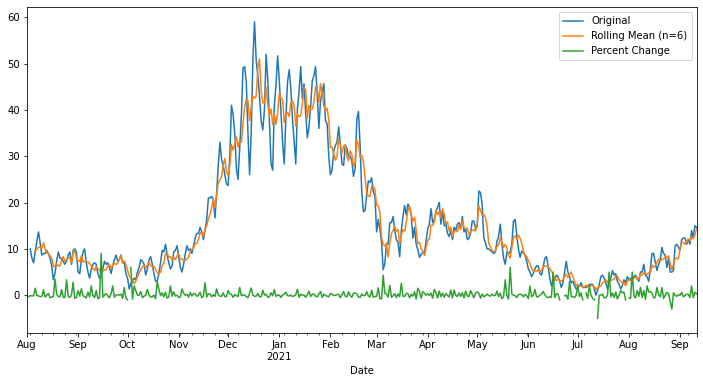

In [23]:
WINDOW = 6
fig, ax = plt.subplots()
ts.rolling(3).mean().plot(label='Original',ax=ax)
ts.rolling(WINDOW).mean().plot(label=f'Rolling Mean (n={WINDOW})',ax=ax)
ts.pct_change().plot(label='Percent Change',ax=ax)
ax.legend()

#### Running into inf values!

In [24]:
ts_pct_change = ts.pct_change()#.dropna()
(ts_pct_change == np.inf).sum()

4

In [25]:
ts_pct_change.loc[ts_pct_change == np.inf]

Date
2020-10-02    inf
2021-06-22    inf
2021-07-05    inf
2021-07-31    inf
Name: Deaths-New, dtype: float64

In [26]:
## diagnose infinity values
idx_slice = slice('06-18-2021',"06-26-2021")

pd.concat([ts_pct_change.loc[idx_slice],ts.loc[idx_slice]],axis=1)
# display()
# display()
# ts_pct_change.loc['06-18-2021':"06-26-2021"]#.plot()

,Deaths-New,Deaths-New
Date,,
2021-06-18,0.333333,4.0
2021-06-19,0.250000,5.0
2021-06-20,-1.000000,0.0
2021-06-21,NaN,0.0
2021-06-22,inf,8.0
2021-06-23,-0.125000,7.0
2021-06-24,0.000000,7.0
2021-06-25,-0.857143,1.0
2021-06-26,3.000000,4.0


#### Notes: dealing with inf values

- Replace `np.inf` with `np.nan`



In [27]:
ts_pct_change = ts_pct_change.replace({np.inf:np.nan,
                                      -np.inf:np.nan})
ts_pct_change

Date
2020-08-01         NaN
2020-08-02   -0.307692
2020-08-03   -0.111111
2020-08-04   -0.125000
2020-08-05   -0.142857
                ...   
2021-09-07   -0.500000
2021-09-08    2.000000
2021-09-09   -0.571429
2021-09-10    0.666667
2021-09-11    0.333333
Freq: D, Name: Deaths-New, Length: 407, dtype: float64

In [28]:
def calc_perc_change(ts,periods=1,replace_inf_with_nan=True):
    """Calculated the pct_change with pandas and optionall replaces inf values"""
    ts_pct_change = ts.pct_change(periods=periods)#
    
    if replace_inf_with_nan:
        ts_pct_change = ts_pct_change.replace({np.inf:np.nan,
                                      -np.inf:np.nan})

    return ts_pct_change

<AxesSubplot:xlabel='Date'>

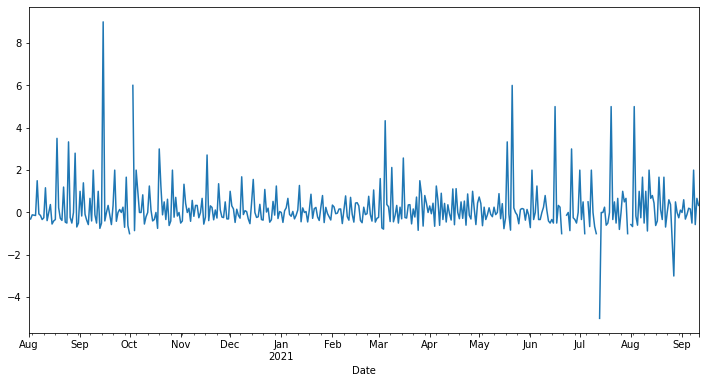

In [29]:
ts_pc_ch = calc_perc_change(ts)
ts_pc_ch.plot()

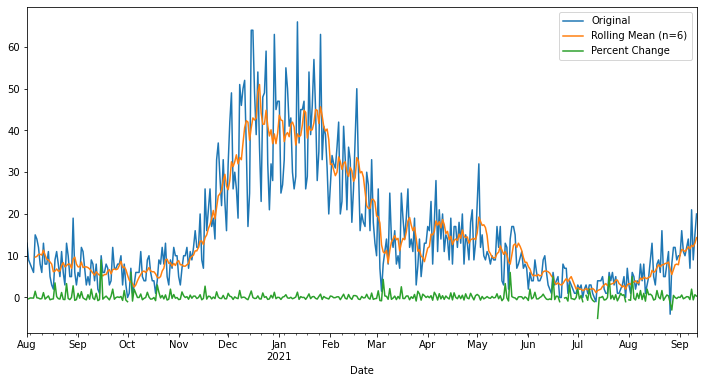

In [30]:
## Visualizing OUtliers + Percent Change
WINDOW = 6
fig, ax = plt.subplots()
ts.plot(label='Original',ax=ax)
ts.rolling(WINDOW).mean().plot(label=f'Rolling Mean (n={WINDOW})',ax=ax)

ts_pc_ch = calc_perc_change(ts)
ts_pc_ch.plot(label='Percent Change',ax=ax)
ax.legend()

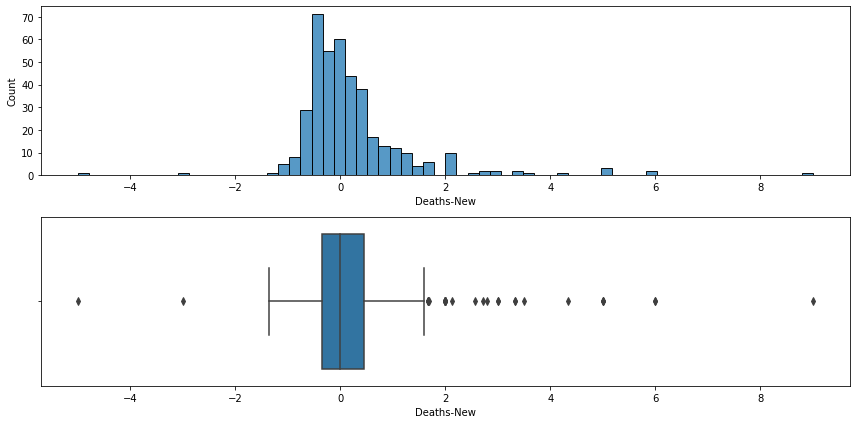

In [31]:
fig,axes = plt.subplots(nrows=2)
sns.histplot(x=ts_pc_ch,ax=axes[0])
sns.boxplot(x=ts_pc_ch,ax=axes[1])
fig.tight_layout()

In [32]:
# ts_pc_ch = calc_perc_change(ts)
# ts_pc_ch.loc[ts_pc_ch.abs()>20]

### developing `remove_outliers_ts`

In [35]:
# def remove_outliers_ts(ts_,threshold_type='pct_change',raw_thresh=100,
#                        pct_thresh=50, n_diff=1,fill_method='interpolate'):
#     """ Remove outliers from time series.
    
#     Parameters:
#         - ts 
#         - threshold_type {'raw',('pct_change','%'),('zero','0')}
#         - raw_thresh 
#         - pct_thresh
#         - n_diff (1) - period for .diff or .pct_change
#     """
    
#     if isinstance(ts_, pd.Series):
#         ts_df = ts_.to_frame(ts_.name)
#     else:
#         ts_df = ts_.copy()
    
#     ## sve copy to remove outleirs from
#     ts_out = ts_df.copy()
    
#     for col in ts_df.columns:
#         ts = ts_df[col].copy()
        
#         ## use threshold techniques to identify outleirs
#         if threshold_type == 'raw':
#             ## saving deltas 
#             deltas  = ts.diff(n_diff)
#             idx_outliers = deltas.abs()>raw_thresh

#         elif (threshold_type == '%') | (threshold_type == 'pct_change'):
#             deltas = calc_perc_change(ts,periods=n_diff)
#             idx_outliers = deltas.abs() > pct_thresh


#         elif (threshold_type == 'zero') | (threshold_type == '0'): 
#             deltas = ts.copy()
#             idx_outliers = ts == 0
#         else:
#             raise Exception("Other threshold_kinds are not yet implemented.")


#         ## SSaving outleirs
#         outliers = deltas[idx_outliers]


#         ## Filling in outliers
# #         ts_out = ts.copy()
#         ts_out[col].loc[outliers.index] = np.nan
    
    
    

#         ## Deal with null values:
#         if fill_method == 'interpolate':
#             ts_out[col] = ts_out[col].interpolate()

#         elif fill_method == None:
#             pass

#         else:
#             ts_out[col] = ts_out[col].fillna(method=fill_method)

    
#     return ts_out
     
    
fs.ihelp(fn.app_functions.remove_outliers_ts)

------------------------------------------------------------------------------------
------ SOURCE ----------------------------------------------------------------------


```python
def remove_outliers_ts(ts_,threshold_type='pct_change',raw_thresh=100,
                       pct_thresh=50, n_diff=1,fill_method='interpolate'):
    """ Remove outliers from time series.
    
    Parameters:
        - ts 
        - threshold_type {'raw',('pct_change','%'),('zero','0')}
        - raw_thresh 
        - pct_thresh
        - n_diff (1) - period for .diff or .pct_change
    """
    
    if isinstance(ts_, pd.Series):
        ts_df = ts_.to_frame(ts_.name)
    else:
        ts_df = ts_.copy()
    
    ## sve copy to remove outleirs from
    ts_out = ts_df.copy()
    
    for col in ts_df.columns:
        ts = ts_df[col].copy()
        
        ## use threshold techniques to identify outleirs
        if threshold_type == 'raw':
            ## saving deltas 
            deltas  = ts.diff(n_diff)
            idx_outliers = deltas.abs()>raw_thresh

        elif (threshold_type == '%') | (threshold_type == 'pct_change'):
            deltas = calc_perc_change(ts,periods=n_diff)
            idx_outliers = deltas.abs() > pct_thresh


        elif (threshold_type == 'zero') | (threshold_type == '0'): 
            deltas = ts.copy()
            idx_outliers = ts == 0
        else:
            raise Exception("Other threshold_kinds are not yet implemented.")


        ## SSaving outleirs
        outliers = deltas[idx_outliers]


        ## Filling in outliers
#         ts_out = ts.copy()
        ts_out[col].loc[outliers.index] = np.nan
    
    
    

        ## Deal with null values:
        if fill_method == 'interpolate':
            ts_out[col] = ts_out[col].interpolate()

        elif fill_method == None:
            pass

        else:
            ts_out[col] = ts_out[col].fillna(method=fill_method)

    
    return ts_out

```

In [ ]:
# test_df = get_state_df_ts(DF,'MD',agg_func= 'mean',ts_col=selected_cols,
#                           rename_cols=False,fill_method='interpolate',
#                           diagnose=False)#state_first=False)

# test_df['Cases-New'].plot()

In [ ]:
# clean_df = remove_outliers_ts(test_df['Cases-New'],fill_method='interpolate',threshold_type="0")
# clean_df.plot()

In [ ]:
# test_df.plot()

In [ ]:
# ts =test_df['Deaths-New'].copy()
# ts_clean = remove_outliers_ts(ts,threshold_type='%')

# ax = ts.plot(label='Original')
# ts_clean.plot(label='Clean',ax=ax)
# ax.legend()

In [ ]:
# fig, axes = plt.subplots(nrows=2)

# test_df = get_state_df_ts(DF,'MD',agg_func= 'mean',ts_col=selected_cols,
#                           rename_cols=False,fill_method='interpolate',
#                           diagnose=False)#state_first=False)

# test_df_clean = remove_outliers_ts(test_df,threshold_type='%')

# test_df.plot(title='Original',ax=axes[0])
# test_df_clean.plot(title='Clean',ax=axes[1])
# # ax.legend()

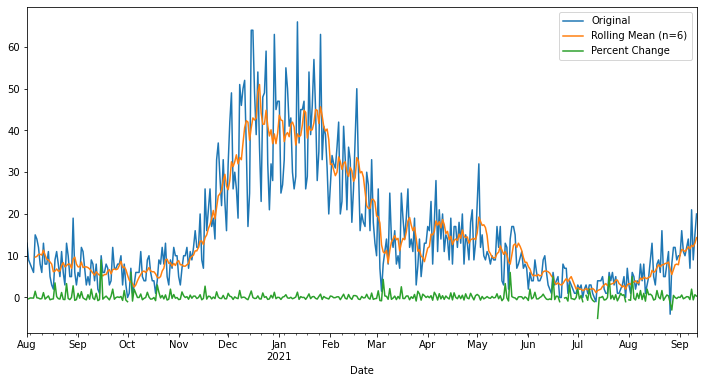

In [36]:
## Visualizing OUtliers + Percent Change
WINDOW = 6
fig, ax = plt.subplots()
ts.plot(label='Original',ax=ax)
ts.rolling(WINDOW).mean().plot(label=f'Rolling Mean (n={WINDOW})',ax=ax)

ts_pc_ch = calc_perc_change(ts)
ts_pc_ch.plot(label='Percent Change',ax=ax)
ax.legend()

### write `get_state_df_ts_final` (will replace original `get_state_df_ts` when completed)


In [37]:
# fs.ihelp(remove_outliers_ts)

In [38]:
# ## to replace af.get_state_ts
fs.ihelp(fn.app_functions.get_state_df_ts)


# ### BEST VERSION YET! 09/12 ######
# def get_state_df_ts_final(STATES, state_name,ts_col=None,group_col='state',# legacy compatible
#                      freq='D', start_date='08-2020', agg_func='mean', #formerly sum
#                     fill_nans=True, fill_method='interpolate',
#                     rename_cols=True,name_sep=' - ',state_first=False,
#                     remove_outliers=True,  n_diff=1, threshold_type='pct_change',
#                       raw_thresh=100, pct_thresh=50, 
#                           diagnose=True):
#     """Take df_us and extracts state's data as then Freq/Aggregation provided
    
    
#     Paramters:
    
#         - DF
#         - state_name
#         - ts_col
#         - group_col
#         - freq 
#         - start_date
#         - agg_func
#         -  fill_nans
#         - fill_method
        
        
#     Note on order:
#     1. make state_df
#     2. resample and aggregate
#     3. slice start_date
#     4. Select columns
#     5. Remove Outliers
#     6. Fill Null values
#     7. Rename columns
    
#     """
#     ## Get default arguments for try/except
#     import inspect
#     args = inspect.signature(get_state_df_ts)
#     args = {k:v.default for k,v in args.parameters.items()}  
    
    
#     ## Slice state_df depending on which datatype 
#     if isinstance(STATES,dict):
#         state_df = STATES[state_name].copy()
        
#     elif isinstance(STATES, pd.DataFrame):
#         ## Slicing out state df for index dates 
#         state_df = STATES.loc[state_name].copy()

#     else:
#         ## Get state_df group
#         state_df = STATES.groupby(group_col).get_group(state_name)#.resample(freq).agg(agg)

        
        
#     ## visualize pre-resampling
#     if diagnose:
#         pfig = px.line(state_df,title='Pre-Resampling')
#         pfig.show()
    

#     ## Resampling and Aggregating 
#     if agg_func=='as_freq':
#         try:
#             state_df = state_df.resample(freq).asfreq(freq)
#         except Exception as e:

#             agg_func = args['agg_func']
#             state_df = state_df.resample(freq).agg(agg_func)
#             print(f"[!] Erorr using agg_func='as_freq'; Using default agg_func ('{agg_func}') instead.")
#             print('\tError message below:')
#             print("\t",e)        
            
#     elif agg_func is None:
#         pass
    
#     else:
#         state_df = state_df.resample(freq).agg(agg_func)
        
        
#     ## Slice out time period desired.
#     state_df = state_df.loc[start_date:]
    
    
#     ## Return only columns containing ts_cols
#     if ts_col is not None:

#         if isinstance(ts_col,str):
#             ts_col = [ts_col]

#         # find cols that end with the column name
#         selected_cols=[]
#         for col in ts_col:
#             selected_cols.extend([c for c in state_df.columns if c.endswith(col)])
            
#         state_df = state_df[selected_cols]
        
        
#     ## Remove Outleirs
#     if remove_outliers:
        
#         if isinstance(threshold_type,str):
#             threshold_type= [threshold_type]
            
#         for thresh_type in threshold_type:
#             state_df = remove_outliers_ts(state_df,threshold_type=thresh_type,
#                                          raw_thresh=raw_thresh,pct_thresh=pct_thresh,
#                                          n_diff=n_diff,fill_method=fill_method)
        
   
    
#     ## Deal with reamaining  null values:  (REMOVE??)
#     if fill_method == 'interpolate':
#         state_df = state_df.interpolate()
        
#     elif fill_method == None:
#         pass
    
#     else:
#         state_df = state_df.fillna(method=fill_method)
    
        

#      ## Rename columns with state name
#     if rename_cols == True:
    
#         ## Get and Rename Sum Cols 
#         orig_cols = state_df.columns

#         for col in orig_cols:

#             if state_first==True:
#                 new_col_name = f"{state_name}{name_sep}{col}"
#             else:
#                 new_col_name = f"{col}{name_sep}{state_name}"

#             state_df[new_col_name] = state_df[col].copy()

#         ## Drop original cols
#         state_df.drop(orig_cols,axis=1,inplace=True)
    

#     ## Visualize post-resampling 
#     if diagnose:
#             pfig = px.line(state_df,title="post-Resampling")
#             pfig.show()

    
    
#     return state_df

------------------------------------------------------------------------------------
------ SOURCE ----------------------------------------------------------------------


```python
def get_state_df_ts(STATES, state_name,ts_col=None,group_col='state',# legacy compatible
                     freq='D', start_date='08-2020', agg_func='mean', #formerly sum
                    fill_nans=True, fill_method='interpolate',
                    rename_cols=True,name_sep=' - ',state_first=True,diagnose=True):
    """Take df_us and extracts state's data as then Freq/Aggregation provided
    
    
    Paramters:
    
        - DF
        - state_name
        - ts_col
        - group_col
        - freq 
        - start_date
        - agg_func
        -  fill_nans
        - fill_method
    
    """
    import inspect
    args = inspect.signature(get_state_df_ts)
    args = {k:v.default for k,v in args.parameters.items()}  
    
    
    if isinstance(STATES,dict):
        state_df = STATES[state_name].copy()
        
    elif isinstance(STATES, pd.DataFrame):
        ## Slicing out state df for index dates 
        state_df = STATES.loc[state_name].copy()

    else:
        ## Get state_df group
        state_df = STATES.groupby(group_col).get_group(state_name)#.resample(freq).agg(agg)

        
    ## visualize pre-resampling
    if diagnose:
        pfig = px.line(state_df,title='Pre-Resampling')
        pfig.show()
    
    
    if agg_func=='as_freq':
        try:
            state_df = state_df.resample(freq).asfreq(freq)
        except Exception as e:

            agg_func = args['agg_func']
            state_df = state_df.resample(freq).agg(agg_func)
            print(f"[!] Erorr using agg_func='as_freq'; Using default agg_func ('{agg_func}') instead.")
            print('\tError message below:')
            print("\t",e)        
    elif agg_func is None:
        pass
    else:
        ## Resample and aggregate state data
        state_df = state_df.resample(freq).agg(agg_func)
        
    ## Slice out time period desired.
    state_df = state_df.loc[start_date:]
    

    
    
    ## Deal with null values:
    if fill_method == 'interpolate':
        state_df = state_df.interpolate()
        
    elif fill_method == None:
        pass
    
    else:
        state_df = state_df.fillna(method=fill_method)
        
        
        

     ## Renamed columns with state name
    if rename_cols == True:
    
        ## Get and Rename Sum Cols 
        orig_cols = state_df.columns

        for col in orig_cols:

            if state_first==True:
                new_col_name = f"{state_name}{name_sep}{col}"
            else:
                new_col_name = f"{col}{name_sep}{state_name}"

            state_df[new_col_name] = state_df[col].copy()

        ## Drop original cols
        state_df.drop(orig_cols,axis=1,inplace=True)
    
    
    
    ## Return only columns containing ts_cols
    if ts_col is not None:

        if isinstance(ts_col,str):
            ts_col = [ts_col]

            # find cols that end with the column name
        selected_cols=[]
        for col in ts_col:
            selected_cols.extend([c for c in state_df.columns if c.endswith(col)])
            
        state_df = state_df[selected_cols]
        
    ## Add outlier removal here:
        
        
        
    ## Visualize post-resampling 
    if diagnose:
            pfig = px.line(state_df,title="post-Resampling")
            pfig.show()
    
    
    return state_df

```

In [41]:
def compare_cols_post_outlier_removal():
    """Quick Function to compare preprcoessing with get_state_df_ts_final
    across all columns (pair-wise)"""
    



    test_df_raw = fn.app_functions.get_state_df_ts_final(DF,'MD',agg_func= 'sum',ts_col=selected_cols,
                              rename_cols=False,fill_method='interpolate',
                                    remove_outliers=False, threshold_type=['%','0'],
                              diagnose=False)#state_first=False)
    
    test_df_clean = fn.app_functions.get_state_df_ts_final(DF,'MD',agg_func= 'sum',ts_col=selected_cols,
                              rename_cols=False,fill_method='interpolate',
                                    remove_outliers=True, threshold_type=['0','%'],
                              diagnose=False)#state_first=False)

    nrows = len(test_df_raw.columns)
    fig, axes = plt.subplots(nrows=nrows,figsize=(12,4*nrows))
    
    for i,col in enumerate(test_df_clean.columns):
        test_df_raw[col].plot(ax=axes[i],ls="--",label=f'{col}-Raw')
        test_df_clean[col].plot(ax=axes[i],ls=":",label=f"{col}Clean")
        axes[i].legend()

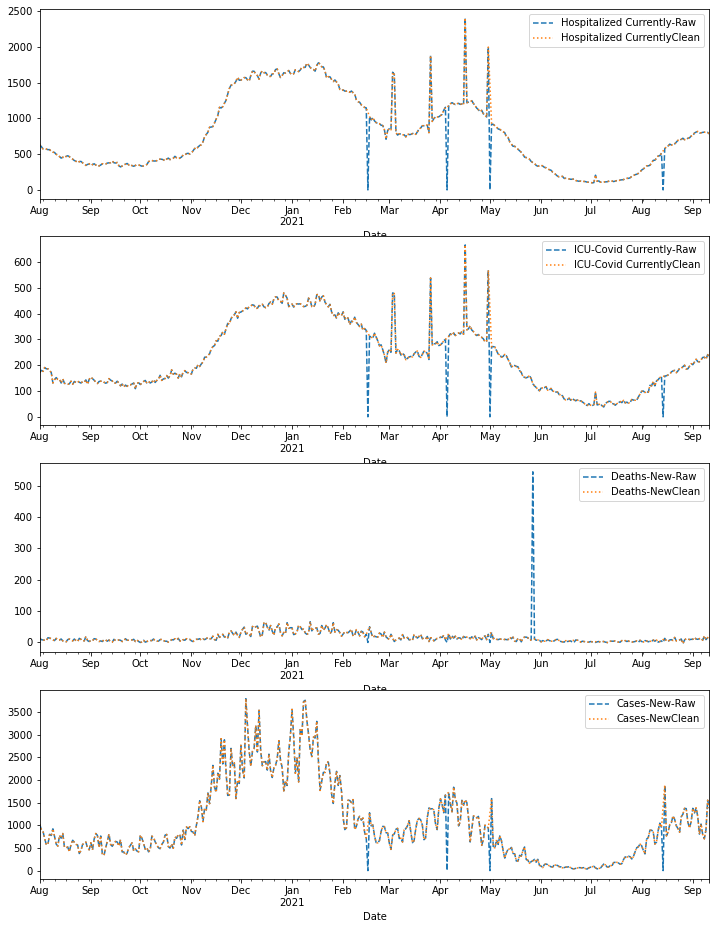

In [42]:
compare_cols_post_outlier_removal()

In [ ]:
# ts_clean = remove_outliers_ts(test_df,threshold_type='%',pct_thresh=5)
# ax = test_df.plot(title='Original',ax=axes[0])

# ts_clean.plot(title='Clean',ax=axes[1])
# ax.legend()
# ts_clean

### Using New Functions in `get_states_to_plot`

In [43]:
get_ts_df_kwargs = dict(agg_func= 'mean',
              rename_cols=True,fill_method='interpolate',
              remove_outliers=False, state_first=False,
              threshold_type=['0','%'], diagnose=False)

state_list = DF.index.get_level_values(0).unique()

fs.ihelp(fn.app_functions.get_states_to_plot)


# def get_states_to_plot(DF,state_list=["NY",'MD','TX','PA', 'FL'],
#                        plot_cols=None, 
#                       agg_func= 'mean',
#               rename_cols=True,fill_method='interpolate',
#               remove_outliers=False, state_first=False,
#               threshold_type=['0','%'], diagnose=False):
    
#     get_states_kwargs = dict(rename_cols=rename_cols,
#                           fill_method=fill_method,
#                           state_first=state_first,
#                            threshold_type=threshold_type,
#                           diagnose=diagnose)
    
#     if state_list is None:   
#         if isinstance(DF,pd.DataFrame):
#             state_list = list(DF.index.get_level_values(0).unique())
    
#         elif isinstance(DF,dict):
#             state_list = list(sorted(DF.keys()))
    
#     ## Get each state
#     dfs_to_concat = []
#     for state in state_list:
#         dfs = get_state_df_ts_final(DF,state,ts_col=plot_cols,**get_states_kwargs)
#         dfs_to_concat.append(dfs)
        
        
#      ## Concatenate final dfs
#     try:
#         plot_df = pd.concat(dfs_to_concat,axis=1)#[STATES[s] for s in plot_states],axis=1).iplot()
#         new_order = sorted(plot_df.columns.to_list())
#         plot_df = plot_df[new_order]
#     except:
#         print('[!] pd.concat failed, returning list...')
#         plot_df = dfs_to_concat
#     return plot_df

------------------------------------------------------------------------------------
------ SOURCE ----------------------------------------------------------------------


```python
def get_states_to_plot(DF,state_list=["NY",'MD','TX','PA', 'FL'],
                       plot_cols=None, 
                      agg_func= 'mean',
              rename_cols=True,fill_method='interpolate',
              remove_outliers=False, state_first=False,
              threshold_type=['0','%'], diagnose=False):
    
    get_states_kwargs = dict(rename_cols=rename_cols,
                          fill_method=fill_method,
                          state_first=state_first,
                           threshold_type=threshold_type,
                          diagnose=diagnose)
    
    if state_list is None:   
        if isinstance(DF,pd.DataFrame):
            state_list = list(DF.index.get_level_values(0).unique())
    
        elif isinstance(DF,dict):
            state_list = list(sorted(DF.keys()))
    
    ## Get each state
    dfs_to_concat = []
    for state in state_list:
        dfs = get_state_df_ts_final(DF,state,ts_col=plot_cols,**get_states_kwargs)
        dfs_to_concat.append(dfs)
        
        
     ## Concatenate final dfs
    try:
        plot_df = pd.concat(dfs_to_concat,axis=1)#[STATES[s] for s in plot_states],axis=1).iplot()
        new_order = sorted(plot_df.columns.to_list())
        plot_df = plot_df[new_order]
    except:
        print('[!] pd.concat failed, returning list...')
        plot_df = dfs_to_concat
    return plot_df

```

In [44]:

plot_df = fn.app_functions.get_states_to_plot(DF,state_list=None,plot_cols=['Cases-New','Death-New'],
                            agg_func= 'mean',
                  rename_cols=True,fill_method='interpolate',
                  remove_outliers=False, state_first=True,
                  threshold_type=['0','%'], diagnose=False)
plot_df

,AK - Cases-New,AL - Cases-New,AR - Cases-New,AZ - Cases-New,CA - Cases-New,CO - Cases-New,CT - Cases-New,DC - Cases-New,DE - Cases-New,FL - Cases-New,GA - Cases-New,HI - Cases-New,IA - Cases-New,ID - Cases-New,IL - Cases-New,IN - Cases-New,KS - Cases-New,KY - Cases-New,LA - Cases-New,MA - Cases-New,MD - Cases-New,ME - Cases-New,MI - Cases-New,MN - Cases-New,MO - Cases-New,MS - Cases-New,MT - Cases-New,NC - Cases-New,ND - Cases-New,NE - Cases-New,NH - Cases-New,NJ - Cases-New,NM - Cases-New,NV - Cases-New,NY - Cases-New,OH - Cases-New,OK - Cases-New,OR - Cases-New,PA - Cases-New,PR - Cases-New,RI - Cases-New,SC - Cases-New,SD - Cases-New,TN - Cases-New,TX - Cases-New,UT - Cases-New,VA - Cases-New,VT - Cases-New,WA - Cases-New,WI - Cases-New,WV - Cases-New,WY - Cases-New
Date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2020-08-01,152.0,2033.0,662.0,2992.0,5872.0,458.0,NaN,79.0,89.0,9642.000,3660.0,86.0,540.000000,394.0,1639.0,968.0,228.0,572.0,NaN,152.0,1019.0,25.000000,758.0,725.0,1018.0,1134.0,116.0,1402.0,133.0,180.0,31.0,405.0,196.0,986.0,755.0,928.0,1244.0,325.0,698.0,546.0,NaN,1583.0,103.0,2225.0,6108.0,506.0,913.0,7.0,630.0,1062.0,159.0,43.0
2020-08-02,145.0,1159.0,637.0,1465.0,5204.0,460.0,NaN,69.0,72.0,7104.000,3165.0,45.0,430.000000,477.0,1470.0,735.0,279.0,462.0,3467.0,121.0,909.0,21.000000,426.0,759.0,559.0,672.0,112.0,1370.0,58.0,311.0,20.0,351.0,220.0,1131.0,553.0,944.0,494.0,280.0,588.0,292.0,NaN,1189.0,88.0,1443.0,3188.0,473.0,981.0,5.0,551.0,922.0,120.0,39.0
2020-08-03,78.0,1044.0,787.0,1030.0,4565.0,241.0,252.0,39.0,106.0,4752.000,2258.0,206.0,182.000000,560.0,1298.0,576.0,563.0,323.0,1099.0,381.0,870.0,12.000000,616.0,613.0,1069.0,572.0,40.0,1580.0,125.0,254.0,26.0,308.0,114.0,994.0,590.0,932.0,377.0,269.0,833.0,278.0,224.0,1163.0,65.0,1009.0,9279.0,354.0,1324.0,1.0,680.0,404.0,120.0,40.0
2020-08-04,69.0,955.0,784.0,1008.0,10003.0,426.0,48.0,85.0,82.0,5446.000,2513.0,143.0,326.000000,566.0,1471.0,822.0,350.0,689.0,3615.0,324.0,710.0,7.000000,801.0,602.0,1242.0,1074.0,81.0,1227.0,148.0,222.0,33.0,393.0,210.0,980.0,633.0,1143.0,861.0,333.0,803.0,300.0,144.0,1239.0,59.0,1805.0,10904.0,378.0,1145.0,4.0,685.0,728.0,81.0,36.0
2020-08-05,60.0,1866.0,912.0,1698.0,4315.0,594.0,115.0,45.0,159.0,5409.000,3765.0,172.0,605.000000,472.0,1759.0,720.0,469.0,544.0,1482.0,347.0,572.0,17.000000,718.0,617.0,1150.0,1245.0,115.0,1953.0,124.0,311.0,26.0,400.0,226.0,649.0,484.0,1199.0,1101.0,279.0,731.0,271.0,91.0,1282.0,89.0,1657.0,10544.0,421.0,798.0,5.0,831.0,884.0,103.0,39.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-09-07,2148.0,2672.0,583.0,1982.0,11581.0,1844.0,1612.0,651.0,348.0,114725.500,25944.0,499.0,8697.142857,2527.0,12051.0,12981.0,37.0,12979.0,5532.0,5683.0,795.0,488.666667,6908.0,2074.0,2420.0,704.0,1218.0,25188.0,271.0,1788.0,1003.0,354.0,2499.0,3193.0,3248.0,4876.0,10073.0,5515.0,3870.0,277.0,906.0,3783.0,453.0,38798.0,23948.0,4657.0,2007.0,200.0,12637.2,859.0,1008.0,1289.0
2021-09-08,842.0,4791.0,2181.0,2222.0,10585.0,1540.0,935.0,125.0,238.0,111106.375,8752.0,380.0,8762.000000,1526.0,10376.5,2901.0,36.0,4456.0,3066.0,1475.0,701.0,732.000000,3308.0,2878.0,3677.0,1934.0,1047.0,4752.0,639.0,578.0,540.0,3498.0,541.0,1446.0,2699.0,6823.0,1300.0,2590.0,6229.0,351.0,77.0,3157.0,1230.0,5422.0,40882.0,1539.0,4479.0,111.0,14791.0,2533.0,1352.0,802.0
2021-09-09,842.0,4367.0,2481.0,1240.0,5485.0,1900.0,626.0,165.0,352.0,107487.250,7586.0,429.0,8762.000000,1459.0,8702.0,5154.0,35.0,5244.0,5071.0,2407.0,907.0,620.000000,5165.0,1211.0,2518.0,3138.0,998.0,6290.0,615.0,955.0,523.0,2210.0,576.0,1115.0,6319.0,7897.0,2462.0,2414.0,8588.0,698.0,729.0,3556.0,619.0,4200.0,24659.0,2946.5,3952.0,152.0,4063.0,2096.0,1743.0,533.0


In [45]:
px.line(plot_df)#[c for c in plot_df.columns if c.endswith('Cases-New')]])

### Map of US Stats for time period

In [46]:
import datetime as dt
today = dt.date.today()
end_state = today
start_date = pd.Timestamp(today) - pd.Timedelta('90 days')
start_date

Timestamp('2021-06-23 00:00:00')

### Cases in the Last 90 Days

In [47]:
cases_df = fn.app_functions.get_states_to_plot(DF,state_list=None,plot_cols='Cases-New',
                             agg_func= 'mean',
                      rename_cols=True,fill_method='interpolate',
                      remove_outliers=True, state_first=True,
                      threshold_type=['0','%'], diagnose=False)

cases_df.columns = [c.split(' - ')[0] for c in cases_df.columns]
cases_df = cases_df.loc[start_date:end_state]
cases_df

,AK,AL,AR,AZ,CA,CO,CT,DC,DE,FL,GA,HI,IA,ID,IL,IN,KS,KY,LA,MA,MD,ME,MI,MN,MO,MS,MT,NC,ND,NE,NH,NJ,NM,NV,NY,OH,OK,OR,PA,PR,RI,SC,SD,TN,TX,UT,VA,VT,WA,WI,WV,WY
Date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2021-06-23,72.0,381.000000,389.000000,490.0,915.0,504.0,38.000000,9.000000,22.0,10775.714286,389.0,42.0,92.000000,153.0,258.000000,282.000000,341.000000,160.000000,482.0,68.0,59.0,13.000000,236.0,71.0,841.0,118.000000,62.000000,461.000000,16.0,53.0,18.000000,268.0,76.000000,447.0,261.0,323.0,265.000000,227.0,135.0,20.0,52.000000,88.0,25.000000,189.0,1216.0,527.0,228.0,8.00,803.0,117.0,62.000000,72.000000
2021-06-24,86.8,460.500000,383.000000,626.0,1102.0,592.0,153.000000,13.000000,21.0,10911.857143,357.0,55.0,56.000000,161.5,248.000000,287.000000,298.000000,166.000000,365.0,78.0,66.0,10.000000,175.0,121.0,1238.0,302.000000,68.000000,394.000000,13.0,50.0,26.000000,272.0,81.000000,448.0,397.0,303.0,273.000000,225.0,361.0,69.0,20.000000,131.0,11.000000,62.0,1585.0,462.0,254.0,6.00,546.0,138.0,55.000000,71.000000
2021-06-25,101.6,540.000000,302.000000,587.0,1185.0,402.0,127.000000,8.000000,16.0,11048.000000,332.0,48.0,79.000000,170.0,292.000000,304.000000,255.000000,189.000000,210.0,60.0,64.0,36.000000,67.0,92.0,891.0,243.000000,58.000000,388.000000,17.0,20.0,11.000000,349.0,75.000000,804.0,352.0,292.0,224.000000,229.0,154.0,38.0,13.000000,121.5,14.000000,65.0,1623.0,309.0,371.0,7.00,492.0,66.0,60.000000,104.000000
2021-06-26,116.4,532.333333,523.333333,475.0,880.0,571.0,131.666667,14.666667,21.0,11710.285714,402.0,64.0,82.000000,158.0,443.666667,389.666667,282.333333,225.333333,454.0,56.0,61.0,39.000000,162.0,69.0,789.0,262.333333,54.666667,546.666667,13.0,48.0,24.666667,237.0,99.333333,841.0,344.0,254.0,342.666667,212.0,148.0,47.0,26.333333,112.0,15.666667,68.0,1401.0,471.0,298.0,8.75,421.0,92.0,94.333333,118.666667
2021-06-27,131.2,524.666667,744.666667,436.0,861.0,233.0,136.333333,21.333333,25.0,12372.571429,228.0,51.0,93.000000,146.0,595.333333,475.333333,309.666667,261.666667,698.0,15.5,66.0,13.000000,257.0,97.0,624.0,281.666667,51.333333,705.333333,6.0,76.0,38.333333,150.0,123.666667,878.0,381.0,154.0,461.333333,138.0,202.0,53.0,39.666667,292.0,17.333333,106.5,176.0,633.0,-232.0,10.50,473.5,118.0,128.666667,133.333333
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-09-07,2148.0,2672.000000,583.000000,1982.0,11581.0,1844.0,1612.000000,651.000000,348.0,114725.500000,25944.0,499.0,8697.142857,2527.0,12051.000000,12981.000000,37.000000,12979.000000,5532.0,5683.0,795.0,488.666667,6908.0,2074.0,2420.0,704.000000,1218.000000,25188.000000,271.0,1788.0,1003.000000,354.0,2499.000000,3193.0,3248.0,4876.0,10073.000000,5515.0,3870.0,277.0,906.000000,3783.0,453.000000,38798.0,23948.0,4657.0,2007.0,200.00,12637.2,859.0,1008.000000,1289.000000
2021-09-08,842.0,4791.000000,2181.000000,2222.0,10585.0,1540.0,935.000000,125.000000,238.0,111106.375000,8752.0,380.0,8762.000000,1526.0,10376.500000,2901.000000,36.000000,4456.000000,3066.0,1475.0,701.0,732.000000,3308.0,2878.0,3677.0,1934.000000,1047.000000,4752.000000,639.0,578.0,540.000000,3498.0,541.000000,1446.0,2699.0,6823.0,1300.000000,2590.0,6229.0,351.0,77.000000,3157.0,1230.000000,5422.0,40882.0,1539.0,4479.0,111.00,14791.0,2533.0,1352.000000,802.000000
2021-09-09,842.0,4367.000000,2481.000000,1240.0,5485.0,1900.0,626.000000,165.000000,352.0,107487.250000,7586.0,429.0,8762.000000,1459.0,8702.000000,5154.000000,35.000000,5244.000000,5071.0,2407.0,907.0,620.000000,5165.0,1211.0,2518.0,3138.000000,998.000000,6290.000000,615.0,955.0,523.000000,2210.0,576.000000,1115.0,6319.0,7897.0,2462.000000,2414.0,8588.0,698.0,729.000000,3556.0,619.000000,4200.0,24659.0,2946.5,3952.0,152.00,4063.0,2096.0,1743.000000,533.000000


In [48]:
# map_cols = ['Deaths-New','Cases-New','ICU-Covid Currently',]


In [49]:
sum_new_cases = cases_df.sum().reset_index()
sum_new_cases.columns= ['state','Cases-New']
sum_new_cases.head()

,state,Cases-New
0,AK,42800.5
1,AL,241626.5
2,AR,143393.5
3,AZ,156782.0
4,CA,664182.5


In [50]:
color_column = 'Cases-New'
map_ = px.choropleth(sum_new_cases,color=color_column,locations='state',
#               hover_data=['Confirmed','Deaths','Recovered'], 
#               hover_name='state',
              locationmode="USA-states", scope='usa', title="Total {} Cases by State".format(color_column),
              color_continuous_scale=px.colors.sequential.Reds)
map_.show(config={'scrollZoom':False})

In [ ]:
# def plot_map_last_n_days():
    

In [51]:
import datetime as dt
# def plot_map_columns(DF,col='Cases-New',last_n_days=90,
#                map_metric='sum',plot_map=True):
#     """
#     """
#     import datetime as dt

#     today = dt.date.today()
#     end_date = today
#     start_date = pd.Timestamp(today) - pd.Timedelta(f'{last_n_days} days')

#     plot_df = get_states_to_plot(DF,state_list=None, plot_cols=col,
#                              agg_func= 'mean',
#                       rename_cols=True,fill_method='interpolate',
#                       remove_outliers=True, state_first=True,
#                       threshold_type=['0','%'], diagnose=False)

#     plot_df.columns = [c.split(' - ')[0] for c in plot_df.columns]
#     plot_df = plot_df.loc[start_date:end_date]
    
    
    
#     agg_data = cases_df.agg(map_metric).reset_index()
#     agg_data.columns= ['state',col]
    
#     if plot_map:
#         color_column = col
#         map_ = px.choropleth(agg_data,color=color_column,locations='state',
#                       locationmode="USA-states", scope='usa', 
#                              title=f"{map_metric.title()} {col} by State (Last {last_n_days} Days)",#.format(color_column),
#                       color_continuous_scale=px.colors.sequential.Reds)
#         map_.show(config={'scrollZoom':False})
#     else:
#         return agg_data
    

In [55]:
## Prototype cell to turn into function for app
fn.app_functions.plot_map_columns(DF,last_n_days=30,map_metric='mean')


rank = fn.app_functions.plot_map_columns(DF,last_n_days=7,map_metric='sum',plot_map=False)
rank = rank.sort_values('Cases-New',ascending=False)
rank["Rank"] = range(1,len(rank)+1) #.reset_index(drop=True)
rank = rank.set_index('Rank')
rank.head().style.format({'Cases-New':"{:,.0f}"})

,state,Cases-New
Rank,,
1,AK,0
2,AL,0
3,ND,0
4,NE,0
5,NH,0


In [56]:
fn.app_functions.plot_map_columns(DF,col='Deaths-New',last_n_days=90,map_metric='sum')

In [61]:
fn.app_functions.plot_map_columns(DF,last_n_days=14,map_metric='sum')

## BOOKMARK 09/12

- I recommend adding back the population-adjusted data using the kaggle dataset from the prior dashboard

## Adding Population-Adjusted Statistics

In [63]:

# def load_us_reference_info(state_abbr_fpath= 'Reference Data/united_states_abbreviations.csv',
# population_fpath= 'Reference Data/us-pop-est2019-alldata.csv'
#                         ):
#     """Return and save US Reference Data"""
#     ## Making Master Lookup CSV
#     import pandas as pd
#     abbrev = pd.read_csv(state_abbr_fpath)
#     pop = pd.read_csv(population_fpath)
#     us_pop = pop.loc[pop['STATE']>0][['NAME','POPESTIMATE2019']].copy()
#     us_info = pd.merge(abbrev,us_pop,right_on='NAME',left_on='State',how="inner")
#     us_info.drop('NAME',axis=1,inplace=True)
#     return us_info

def download_us_pop(data_folder = "./reference_data/",load=True):
    """Downloads world pop zip from kaggle"""
    import os,sys,shutil

    # Download kaggle dataset
    os.system("kaggle datasets download -d peretzcohen/2019-census-us-population-data-by-state")
#     os.system('kaggle datasets download -d tanuprabhu/population-by-country-2020')

    ## Specify file and target folder
    file = '2019-census-us-population-data-by-state.zip'
    target = os.path.join(data_folder,file)

    ## Move zip file to target
    shutil.move(file,target)
    print(f'File saved to {target}')
    
    ## Load csv 
    if load:
        df = pd.read_csv(target)
    else:
        df = target
    return df

In [64]:
df_pop =  download_us_pop()
df_pop

File saved to ./reference_data/2019-census-us-population-data-by-state.zip


,STATE,POPESTIMATE2019,lat,long
0,Alabama,4903185,32.377716,-86.300568
1,Alaska,731545,58.301598,-134.420212
2,Arizona,7278717,33.448143,-112.096962
3,Arkansas,3017804,34.746613,-92.288986
4,California,39512223,38.576668,-121.493629
5,Colorado,5758736,39.739227,-104.984856
6,Connecticut,3565287,41.764046,-72.682198
7,Delaware,973764,39.157307,-75.519722
8,District of Columbia,705749,38.895110,-77.036370
9,Florida,21477737,30.438118,-84.281296


In [65]:
def calculate_per_capita(df,state_cols,df_pop):
    df = df.copy()
    ## ADDING PER CAPITA DATA 
    for col in stat_cols:
        df[f"{col} Per Capita"] = df[col]/df['POPESTIMATE2019']
#     df.drop('POPESTIMATE2019',axis=1,inplace=True)

In [66]:

# def load_us_reference_info(self):
#     """Return and save US Reference Data"""
#     ## Making Master Lookup CSV
#     import pandas as pd
#     abbrev = pd.read_csv('Reference Data/united_states_abbreviations.csv')
#     pop = pd.read_csv('Reference Data/us-pop-est2019-alldata.csv')
#     us_pop = pop.loc[pop['STATE']>0][['NAME','POPESTIMATE2019']].copy()
#     us_info = pd.merge(abbrev,us_pop,right_on='NAME',left_on='State',how="inner")
#     us_info.drop('NAME',axis=1,inplace=True)
#     self.reference_data = us_info
#     return us_info


# def calculate_per_capita(self,df_=None,stat_cols = ['Confirmed','Deaths','Recovered']):
#     """Calculate Per Capita columns"""
#     if df_ is None:
#         df_ = self.df

#     df = df_.copy()

#     if 'POPESTIMATE2019' in df.columns==False:
#         self.load_us_reference_info()

#     ## ADDING PER CAPITA DATA 
#     for col in stat_cols:
#         df[f"{col} Per Capita"] = df[col]/df['POPESTIMATE2019']
#     df.drop('POPESTIMATE2019',axis=1,inplace=True)
#     return df    



# def get_and_clean_US(self,df=None,#save_as = 'Reference Data/united_states_abbreviations.csv',
#                      make_date_index=True,per_capita=True):
#     """Takes raw df loaded and extracts United States and processes
#     all state names to create new abbreviation column 'state'.
#     """
#     import pandas as pd
#     if df is None:
#         df= self._df.copy()

#     ## Get only US
#     df_us = df.groupby('Country/Region').get_group('US').copy() 
#     state_lookup = self.load_us_reference_info()


#     ## Make renaming dict for states
#     STATE_DICT = dict(zip(state_lookup['State'],state_lookup['Abbreviation']))
#     STATE_DICT.update({'Chicago':'IL',
#                       'Puerto Rico':'PR',
#                       'Virgin Islands':'VI',
#                       'United States Virgin Islands':'VI'})

#     ## Separately Process Rows that contain a city, state 
#     df_city_states = df_us[df_us['Province/State'].str.contains(',')]


#     ## Finding City Abbreviations in city_states
#     import re
#     state_expr = re.compile(r"[A-Z\.]{2,4}")
#     df_city_states['state'] = df_city_states['Province/State'].apply(state_expr.findall)
#     df_city_states = df_city_states.explode('state')


#     ## Seperately process Rows that do not contain a city,state
#     df_states = df_us[~df_us['Province/State'].str.contains(',')]
#     df_states['state'] =  df_states['Province/State'].map(STATE_DICT)

#     ## Combining data frame back together
#     df = pd.concat([df_states,df_city_states]).sort_index()
# #         df = df.dropna(subset=['state'])

#     ## Fix some stragglers (like D.C. vs DC)
#     df['state'] = df['state'].replace('D.C.','DC')

#     ## Combine Cleaned Data 
#     df = pd.merge(df, state_lookup,left_on='state',right_on="Abbreviation")

#     df.rename({'State':'State Name'},inplace=True,axis=1)
#     df.drop(columns=['Abbreviation','State Name'],inplace =True)


#     ## Add Population Data
#     if per_capita:

#         for col in  ['Confirmed','Deaths','Recovered']:
#             df[f"{col} Per Capita"] = df[col]/df['POPESTIMATE2019']

#         ## Remove Population 
#         df.drop('POPESTIMATE2019',axis=1,inplace=True)

#     if make_date_index:
#         df = self.set_datetime_index(df)

# #         df.drop(columns=['Province/State'],inplace=True)

#     self.df_us = df.copy()
# #         self.US = df.copy()
#     return df


In [67]:
# us_pop = df_pop.loc[df_pop['STATE']>0][['NAME','POPESTIMATE2019']].copy()
# us_pop

In [69]:
state_index = DF.index.get_level_values(0).unique()
# for state in state_index

In [70]:
# raise Exception('Currently focused on EDA above. Stopping before modeling begings.')

# Selected States [Prior to 09/12/21]

## FL

In [ ]:
FL = STATES['FL'].copy()
FL

In [ ]:
## first non-null hospital timestamps
first_ts = FL[FL['Hospitalized Currently'].notna()].index[0]
first_ts

### Calc Delta Cases/Deaths

In [ ]:
FL.columns

In [ ]:
## Plot deaths/cases
cumulative_cols = [c for c in FL.columns for name in ['Deaths','Cases']if name in c]
FL[cumulative_cols].plot(subplots=True)

In [ ]:
import plotly
plotly.__version__

In [ ]:
import missingno
missingno.matrix(FL)

In [ ]:
# px.imshow(FL.isna(),template='plotly_dark',color_continuous_scale="Reds")

In [ ]:
plot_cols = FL.drop(columns=cumulative_cols).columns
plot_cols

In [ ]:
import plotly 
plotly.__version__

In [ ]:
pfig = px.line(FL,y=plot_cols,width=1000,title="FL Data")
pfig.add_vline(first_ts,line_width=3,line_dash="dash",name='Start')
pfig.show()

In [ ]:
# raise Exception('end of 09/01/21, though below code is still good.')

# Time Series Modeling

In [ ]:
### FORECAST SPECIFIC FUNCTIONS
from statsmodels.tsa.statespace.sarimax import SARIMAX
import statsmodels.api as sms
import statsmodels.tsa.api as tsa
from pmdarima import auto_arima

## MD

In [ ]:
state = "MD"
df_state = STATES[state].loc['08-2020':].copy()
# df_state = df_state.interpolate('time')
# df_state['Deaths-New'] = df_state['Deaths'].diff()
# df_state['Cases-New'] = df_state['Cases'].diff()
df_state = df_state.resample('D').sum()

print(df_state.isna().sum())
df_state

In [ ]:
model_cols = ['Hospitalized Currently','ICU-Covid Currently',
              'Deaths-New','Cases-New'
             ]

## visualize
ax = df_state[model_cols].plot(subplots=True, figsize=(10,12))
plt.tight_layout();

#### Data Quality Issues
- There are strong spikes +/- that are not likely to be real values.

### MD - Cases-New

In [ ]:
# col = 'Cases-New'
# ts = df_state[col].copy()
# ax = ts.plot(title=f"{state}-{col}");
# ax.set_ylabel(col)

#### Train Test Split

In [ ]:
# train,test = fn.modeling.train_test_split_ts(ts,split_index=-30)

#### Checking Seasonal Decompose for Seasonality to Use

In [ ]:
# ## Get Decomposed time sereis
# decomp = tsa.seasonal_decompose(train)
# decomp.plot();

In [ ]:
# ax = decomp.seasonal.loc['01-2021'].plot(figsize=(12,5))
# ax.grid(which='both')

- Seasonality appears to be ~7 days

In [ ]:
# fn.modeling.stationarity_check(train.diff(7).dropna(),window=4);

In [ ]:
# fn.modeling.plot_acf_pacf(train,);

In [ ]:
# fn.modeling.plot_acf_pacf(train,diff=7);

> Add notes about COVID insights from acf/pacf

#### GridSearch SARIMA Orders

In [ ]:
# from pmdarima import auto_arima

# auto_model = auto_arima(train,m=7,trace=True,D=1,
#                         start_p=0, start_q=0,
#                         start_P=0, start_Q=0)
# auto_model.summary()

#### Use Best Params for new SARIMAX

In [ ]:
# model = tsa.SARIMAX(train, order=auto_model.order, 
#                     seasonal_order =auto_model.seasonal_order,
#                     enforce_invertibility=False,
#                     enforce_stationarity=False, 
#                     freq='D').fit()

# fn.modeling.evaluate_model(model,train,test,last_n_lags=180)

#### Next: if happy with forecast, train on entire ts

In [ ]:
# model = tsa.SARIMAX(ts,order=auto_model.order, 
#                     seasonal_order =auto_model.seasonal_order,
#                     enforce_invertibility=False,
#                     enforce_stationarity=False, 
#                     freq='D').fit()
# fn.modeling.diagnose_model(model)
# fn.modeling.plot_forecast(model, ts)

### MD - Hospitalized Currently

In [ ]:
# df_state['Hospitalized Currently']

In [ ]:
# col = 'Hospitalized Currently'
# ts = df_state[col].copy()
# ax = ts.plot(title=f"{state}-{col}");
# ax.set_ylabel(col)

#### Train Test Split

In [ ]:
# train,test = fn.modeling.train_test_split_ts(ts,split_index=-30)

#### Checking Seasonal Decompose for Seasonality to Use

In [ ]:
# ## Get Decomposed time sereis
# decomp = tsa.seasonal_decompose(train)
# decomp.plot();

In [ ]:
# ax = decomp.seasonal.loc['01-2021'].plot()
# ax.grid(which='both')

- Seasonality appears to be ~7 days

In [ ]:
# fn.modeling.stationarity_check(train.diff(7).dropna(),window=4);

In [ ]:
# fn.modeling.plot_acf_pacf(train,);

In [ ]:
# fn.modeling.plot_acf_pacf(train,diff=7);

> Add notes about COVID insights from acf/pacf

#### GridSearch SARIMA Orders

In [ ]:
# from pmdarima import auto_arima

# auto_model = auto_arima(train,m=7,trace=True,D=1,
#                         start_p=0, start_q=0,
#                         start_P=0, start_Q=0)
# auto_model.summary()

#### Use Best Params for new SARIMAX

In [ ]:
# model = tsa.SARIMAX(train, order=auto_model.order, 
#                     seasonal_order =auto_model.seasonal_order,
#                     enforce_invertibility=False,
#                     enforce_stationarity=False, 
#                     freq='D').fit()

# fn.modeling.evaluate_model(model,train,test,last_n_lags=180)

#### Next: if happy with forecast, train on entire ts

In [ ]:
# model = tsa.SARIMAX(ts,order=auto_model.order, 
#                     seasonal_order =auto_model.seasonal_order,
#                     enforce_invertibility=False,
#                     enforce_stationarity=False, 
#                     freq='D').fit()
# fn.modeling.diagnose_model(model)
# fn.modeling.plot_forecast(model, ts)

## 🚨 BOOKMARK: Data Quality Issue - Deaths

- To Do: Remove outliers.
    - Try using .diff() and a high threshold for deterining outliers

### MD - Deaths-New

In [ ]:
col = 'Deaths-New'
ts = df_state[col].copy()
ax = ts.plot(title=f"{state}-{col}");
ax.set_ylabel(col)

In [ ]:
## saving deltas 
deltas  = ts.diff()

## SSaving outleirs
threshold=100
outliers = deltas[deltas.abs()>threshold]
outliers

In [ ]:
outliers= deltas[deltas.abs()>threshold]
outliers

In [ ]:
## saving deltas 
fig, axes = plt.subplots(nrows=2,figsize=(12,9))
ax0 = ts.hist(bins='auto',ax=axes[0])
ax0.set(title='Original time series')

## saving deltas 
ax1 = deltas.hist(bins='auto',ax=axes[1])
ax1.set(title='Daily Change in # of deaths ');

for ax in axes:
    ax.axvline(threshold,ls=':',c='red')
    ax.axvline(-threshold,ls=':',c='red')

In [ ]:
## Plotting High Deltas on original time seires

## saving deltas 
fig, axes = plt.subplots(nrows=2,figsize=(12,9))

ax =axes[0]
ts.plot(ax = ax)
ax.set(title='Original Time Series ')

deltas.plot(ax=axes[1])
for ax in axes:
    [ax.axvline(x_val,label=x_val,lw=0.5,ls = ':',color='red') for x_val in outliers.index]
    ax.legend()



> The issues seem to be entirely in the deltas and therefore 

In [ ]:
## saving deltas 
deltas  = ts.diff()

## SSaving outleirs
threshold=100
outliers = deltas[deltas.abs()>threshold]


## Filling in outliers
ts.loc[outliers.index] = np.nan
ts.interpolate(inplace=True)
ts.plot()

In [ ]:

## Filling in outliers
ts.loc[outliers.index] = np.nan
ts.interpolate(inplace=True)
ts.plot()

In [ ]:
# raise Exception('Deal with the data quality issue above')

#### Train Test Split

In [ ]:
train,test = fn.modeling.train_test_split_ts(ts,split_index=-30)

#### Checking Seasonal Decompose for Seasonality to Use

In [ ]:
## Get Decomposed time sereis
decomp = tsa.seasonal_decompose(train)
decomp.plot();

In [ ]:
ax = decomp.seasonal.loc['01-2021'].plot()
ax.grid(which='both')

- Seasonality appears to be ~7 days

In [ ]:
fn.modeling.stationarity_check(train.diff(7).dropna(),window=4);

In [ ]:
fn.modeling.plot_acf_pacf(train,);

In [ ]:
fn.modeling.plot_acf_pacf(train,diff=7);

> Add notes about COVID insights from acf/pacf

#### GridSearch SARIMA Orders

In [ ]:
from pmdarima import auto_arima

if RUN_MODELS==True:
    auto_model = auto_arima(train,m=7,trace=True,D=1,
                            start_p=0, start_q=0,
                            start_P=0, start_Q=0)
    display(auto_model.summary())

#### Use Best Params for new SARIMAX

In [ ]:
if RUN_MODELS==True:
    model = tsa.SARIMAX(train, order=auto_model.order, 
                    seasonal_order =auto_model.seasonal_order,
                    enforce_invertibility=False,
                    enforce_stationarity=False, 
                    freq='D').fit()

    fn.modeling.evaluate_model(model,train,test,last_n_lags=180)

#### Next: if happy with forecast, train on entire ts

In [ ]:
if RUN_MODELS==True:
    model = tsa.SARIMAX(ts,order=auto_model.order, 
                    seasonal_order =auto_model.seasonal_order,
                    enforce_invertibility=False,
                    enforce_stationarity=False, 
                    freq='D').fit()
    fn.modeling.diagnose_model(model)
    fn.modeling.plot_forecast(model, ts)

# Function For Any Given State/ Column

In [ ]:
## test function
ts = STATES['MD'].copy()
ts.drop(['Deaths','Cases'],1).plot()

In [ ]:
ts['Cases-New'].diff().plot()

In [ ]:
# state = "NY"
# col = 'Deaths'#'Hospitalized Currently'
# start_date='08-2020'
# remove_outliers=True
# threshold=100
# plot=True


# df_state = STATES[state].loc[start_date:].copy()
# df_state = df_state.resample('D').sum()
# ts = df_state[col].copy()
# ts.index.name='Datetime'

# # ts = ts.resample('D').asfreq()
# ts

In [ ]:
def make_timeseries_model(STATES,state = "MD",col = 'Cases-New',
                          start_date='08-2020',split_index=-30,
                         remove_outliers=True,threshold=100,
                         plot=True):
    
    eq = ' '+'==='*30
    
    auto_arima_params = dict(m=7,trace=True,D=1,
                            start_p=0, start_q=0,
                            start_P=0, start_Q=0)
    print(eq,f"\n\tStarting pdmdarima arma grid search for {state} - {col}\n".upper(),
          eq,"\n\t\t{")
    [print(f"\t\t{k} : {v}") for k,v in auto_arima_params.items()]
    print("\t}")
    

    ## Slicing out state df for index dates 
    df_state = STATES[state].loc[start_date:].copy()
    df_state = df_state.resample('D').sum()
    ts = df_state[col].copy()

    ## Outlier removal  #### REPLACE WITH HELPER FUNCTION
    if remove_outliers:
        ## saving deltas 
        deltas  = ts.diff()

        ## SSaving outleirs
        outliers = deltas[deltas.abs()>threshold]


        ## Filling in outliers
        ts.loc[outliers.index] = np.nan
        ts.interpolate(inplace=True)
    
#     if plot:
#         ax = ts.plot(title=f"{state} - {col}");
#         ax.set_ylabel(col)
#         display(ax.get_figure())
        
        

    from pmdarima import auto_arima
    train,test = fn.modeling.train_test_split_ts(ts,split_index=split_index)
    
    ## update axis/labels
    ax = plt.gca()
    ax.set(title=f"{state} - {col}",ylabel=col);
    plt.show()
    
    

    auto_model = auto_arima(train,**auto_arima_params)
    display(auto_model.summary())
        
    model = tsa.SARIMAX(train, order=auto_model.order, 
                    seasonal_order =auto_model.seasonal_order,
                    enforce_invertibility=False,
                    enforce_stationarity=False, 
                    freq='D').fit()

    fn.modeling.evaluate_model(model,train,test,last_n_lags=180)
    
    
    model = tsa.SARIMAX(ts,order=auto_model.order, 
                    seasonal_order =auto_model.seasonal_order,
                    enforce_invertibility=False,
                    enforce_stationarity=False, 
                    freq='D').fit()
    fn.modeling.diagnose_model(model)
    fn.modeling.plot_forecast(model, ts)
    
    return ts, model
    
    
    

# End of 09/11/21 Work

In [ ]:
if RUN_MODELS:
    # if RUN_MODELS==True:
    ts,model = make_timeseries_model(STATES,'NY','Hospitalized Currently')


### Making Dict/DataFrame compatible `make_models_flexible`

- [ ] Replace `make_timeseries_model_flexible`'s data loading with `get_state_df_ts`

In [ ]:
def make_timeseries_model_flexible(STATES,state = "MD",col = 'Cases-New',
                          start_date='08-2020',split_index=-30,
                         remove_outliers=True,threshold=100,freq='D',
                         plot=True):
    
    
    
    
    eq = ' '+'==='*30
    
    auto_arima_params = dict(m=7,trace=True,D=1,
                            start_p=0, start_q=0,
                            start_P=0, start_Q=0)
    print(eq,f"\n\tStarting pdmdarima arma grid search for {state} - {col}\n".upper(),
          eq,"\n\t\t{")
    [print(f"\t\t{k} : {v}") for k,v in auto_arima_params.items()]
    print("\t}")
    
    if isinstance(STATES,dict):
        df_state = STATES[state].loc[start_date:].copy()
        
    elif isinstance(STATES, pd.DataFrame):
        ## Slicing out state df for index dates 
        df_state = DF.loc[state].loc[start_date:].copy()
        
    df_state = df_state.resample(freq).sum()
    ts = df_state[col].copy()

    

     #### Outlier removal  #### REPLACE WITH HELPER FUNCTION ####
    if remove_outliers:
        ## saving deltas 
        deltas  = ts.diff()

        ## SSaving outleirs
        outliers = deltas[deltas.abs()>threshold]


        ## Filling in outliers
        ts.loc[outliers.index] = np.nan
        ts.interpolate(inplace=True)
    
#     if plot:
#         ax = ts.plot(title=f"{state} - {col}");
#         ax.set_ylabel(col)
#         display(ax.get_figure())
     #### #### #### #### #### #### #### #### #### #### #### ####  
    
    
    
    from pmdarima import auto_arima
    train,test = fn.modeling.train_test_split_ts(ts,split_index=split_index)
    
    ## update axis/labels
    ax = plt.gca()
    ax.set(title=f"{state} - {col}",ylabel=col);
    plt.show()
    
    

    auto_model = auto_arima(train,**auto_arima_params)
    display(auto_model.summary())
        
    model = tsa.SARIMAX(train, order=auto_model.order, 
                    seasonal_order =auto_model.seasonal_order,
                    enforce_invertibility=False,
                    enforce_stationarity=False, 
                    freq='D').fit()

    fn.modeling.evaluate_model(model,train,test,last_n_lags=180)
    
    
    model = tsa.SARIMAX(ts,order=auto_model.order, 
                    seasonal_order =auto_model.seasonal_order,
                    enforce_invertibility=False,
                    enforce_stationarity=False, 
                    freq='D').fit()
    fn.modeling.diagnose_model(model)
    fn.modeling.plot_forecast(model, ts)
    
    return ts, model
    

In [ ]:
# raise Exception('Confusion below!')

In [ ]:
if RUN_MODELS:
    # if RUN_MODELS==True:
    ts,model = make_timeseries_model_flexible(DF,'NY','Hospitalized Currently')

# `@interact`

In [ ]:
raise Exception("stop here to avoid interactive menu")

In [ ]:
from ipywidgets import interact
import datetime as dt

@interact
def get_model(state=list(STATES.keys()),
             col=list(STATES['NY'].columns),model=False):
    if model:
        start = dt.datetime.now()
        ts,model = make_timeseries_model(STATES,state,col)
        end = dt.datetime.now()
        print(f'Modeling Process took {end-start} sec.')

# APPENDIX

In [ ]:
# !pip instal streamlit 
# !streamlist run app.py
!code app.py